In [1]:
#question 71
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Normalize the pixel values
X = mnist.data / 255.0
y = mnist.target.astype('int')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, alpha=1e-4,
                                solver='sgd', verbose=10, tol=1e-4, random_state=42, learning_rate_init=.1)
mlp_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Iteration 1, loss = 0.31492933
Iteration 2, loss = 0.13495960
Iteration 3, loss = 0.09313508
Iteration 4, loss = 0.07207364
Iteration 5, loss = 0.05840007
Iteration 6, loss = 0.04816697
Iteration 7, loss = 0.04054670
Iteration 8, loss = 0.03424393
Iteration 9, loss = 0.02840050
Iteration 10, loss = 0.02405012
Iteration 11, loss = 0.01971028
Iteration 12, loss = 0.01630681
Iteration 13, loss = 0.01384345
Iteration 14, loss = 0.01151064
Iteration 15, loss = 0.00963835
Iteration 16, loss = 0.00840026
Iteration 17, loss = 0.00679741
Iteration 18, loss = 0.00584310
Iteration 19, loss = 0.00494133
Iteration 20, loss = 0.00451013
Accuracy: 0.9763571428571428
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.98      0.97      0.97      1380
           3       0.96      0.97      0.97      1433
           4       0.98      0.98      0.98      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.98      1503
           8       0.97      0.96      0.97      1357
           9       0.96      0.97      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



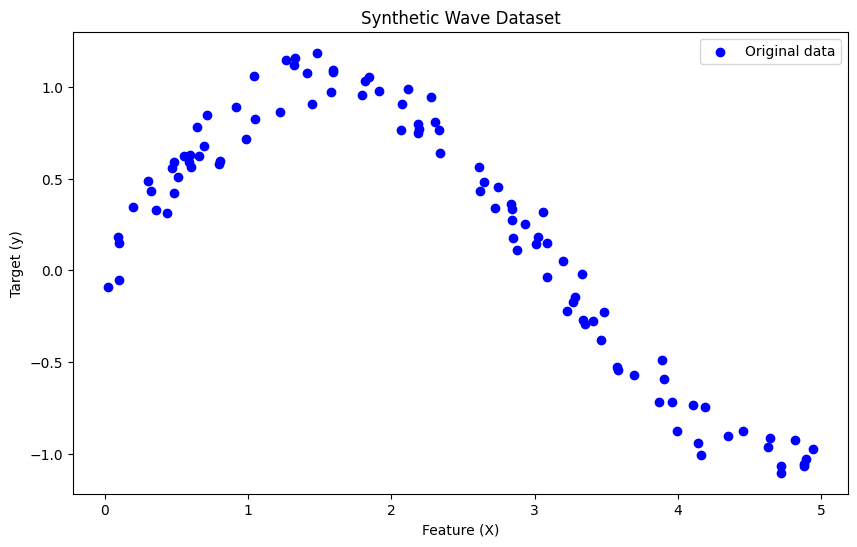

Linear Regression MSE: 0.24308366831859454
Ridge Regression MSE: 0.2430232709393732
Lasso Regression MSE: 0.23495389747801307


In [2]:
#question 72

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Generate synthetic wave dataset
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + 0.1 * np.random.randn(100)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Original data')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Synthetic Wave Dataset')
plt.legend()
plt.show()

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)

# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression MSE:", mse_ridge)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression MSE:", mse_lasso)


In [3]:
#question 73
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate synthetic 2D dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

# Create meshgrid for all possible test points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Flatten the meshgrid and make predictions
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict for all mesh points
Z = model.predict(mesh_points)
Z = Z.reshape(xx.shape)

# Plot the dataset and the predictions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear Regression: Prediction for all possible test points in the xy-plane')
plt.colorbar()
plt.show()



In [4]:
#question 74

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
ari_kmeans = adjusted_rand_score(y, kmeans_labels)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X)
ari_agg = adjusted_rand_score(y, agg_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
ari_dbscan = adjusted_rand_score(y, dbscan_labels)

print("Adjusted Rand Index (ARI) - K-means:", ari_kmeans)
print("Adjusted Rand Index (ARI) - Agglomerative Clustering:", ari_agg)
print("Adjusted Rand Index (ARI) - DBSCAN:", ari_dbscan)


Adjusted Rand Index (ARI) - K-means: 1.0
Adjusted Rand Index (ARI) - Agglomerative Clustering: 1.0
Adjusted Rand Index (ARI) - DBSCAN: 0.6771474966562882


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


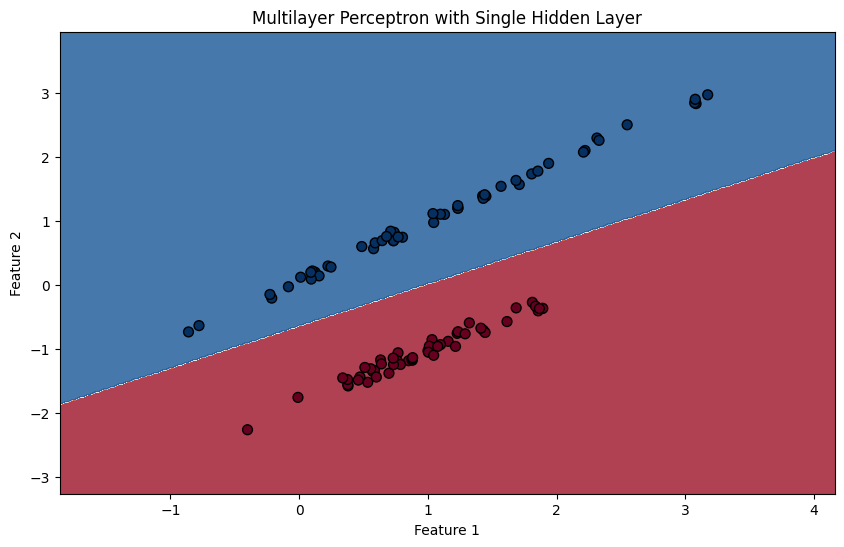

In [7]:
#question 75
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, n_repeated=0, random_state=42)

# Create and fit MLP classifier with a single hidden layer
mlp = MLPClassifier(hidden_layer_sizes=(4,), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X, y)

# Plot decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, s=50, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Multilayer Perceptron with Single Hidden Layer')
plt.show()
